In [209]:
# Bibliotecas que usaremos para Análise de Dados (fonte: Vídeos sobre o assunto no youtube)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas que usaremos para Machine Learning (fonte: Vídeos sobre o assunto no youtube)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Adicionei mais um treinamento para o Machine Learning

from sklearn.ensemble import RandomForestClassifier

# Biblioteca usada para Matriz de Confusão e Analisar o resultado do modelo
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [210]:
# Algumas fontes usadas:
# https://youtu.be/7yJxIAOurxw
# https://www.youtube.com/watch?v=YsEXnV_k83A

In [211]:
stats = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv') # Aqui carrega nossos Dados para serem usados
stats.head() #Função que mostra as 5 primeiras linhas do banco de dados

Chutes a gol 1  Chutes a gol 2  Impedimentos 1  Impedimentos 2  \
0             8.0             0.0             6.0             3.0   
1             0.0             2.0             0.0             2.0   
2             4.0             5.0             1.0             5.0   
3             4.0             7.0             8.0             1.0   
4             3.0             1.0             1.0             3.0   

   Escanteios 1  Escanteios 2  Chutes fora 1  Chutes fora 2  Faltas 1  \
0           7.0           1.0            6.0            1.0       8.0   
1           0.0           4.0            3.0            4.0      19.0   
2           8.0          11.0            2.0            5.0      13.0   
3           6.0           5.0            4.0            7.0       4.0   
4           5.0           4.0            2.0            2.0      12.0   

   Faltas 2  ...  Tiros-livres 1  Tiros-livres 2  Defesas difíceis 1  \
0      14.0  ...             NaN             NaN                 NaN   
1      14.0  ...             NaN             NaN                 NaN   
2      14.0  ...             NaN             NaN                 NaN   
3      11.0  ...             NaN             NaN                 NaN   
4      17.0  ...             NaN             NaN                 NaN   

   Defesas difíceis 2  Posse 1(%)  Posse 2(%)           Time 1        Time 2  \
0                 NaN        77.0        23.0  Glasgow Rangers    Livingston   
1                 NaN        44.0        56.0      Ross County  St.Johnstone   
2                 NaN        47.0        53.0        Dundee FC    St. Mirren   
3                 NaN        27.0        73.0           Hearts        Celtic   
4                 NaN        58.0        42.0         Aberdeen     Dundee U.   

   Position 1  Position 2  
0       4-3-3       4-3-3  
1       3-5-2       3-5-2  
2       4-3-3     3-4-1-2  
3       3-4-3     4-2-3-1  
4       4-4-2     3-5-1-1  

[5 rows x 40 columns]

In [212]:
stats.shape #verificar as dimensoes do dataframe

(27716, 40)

In [213]:
stats.info() # vendo o formato dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27716 entries, 0 to 27715
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       26204 non-null  float64
 1   Chutes a gol 2       26204 non-null  float64
 2   Impedimentos 1       24942 non-null  float64
 3   Impedimentos 2       24942 non-null  float64
 4   Escanteios 1         25388 non-null  float64
 5   Escanteios 2         25388 non-null  float64
 6   Chutes fora 1        25392 non-null  float64
 7   Chutes fora 2        25392 non-null  float64
 8   Faltas 1             25394 non-null  float64
 9   Faltas 2             25394 non-null  float64
 10  Cartões amarelos 1   27716 non-null  float64
 11  Cartões amarelos 2   27716 non-null  float64
 12  Cartões vermelhos 1  27716 non-null  float64
 13  Cartões vermelhos 2  27716 non-null  float64
 14  Cruzamentos 1        9015 non-null   float64
 15  Cruzamentos 2        9015 non-null  

In [214]:
nulos_por_coluna = stats.isna().sum() # verificar se possui nulos (feito na primeira call em grupo)
print(f"Numéros de valores nulos: \n{nulos_por_coluna}")

Numéros de valores nulos: 
Chutes a gol 1          1512
Chutes a gol 2          1512
Impedimentos 1          2774
Impedimentos 2          2774
Escanteios 1            2328
Escanteios 2            2328
Chutes fora 1           2324
Chutes fora 2           2324
Faltas 1                2322
Faltas 2                2322
Cartões amarelos 1         0
Cartões amarelos 2         0
Cartões vermelhos 1        0
Cartões vermelhos 2        0
Cruzamentos 1          18701
Cruzamentos 2          18701
Laterais 1             12549
Laterais 2             12549
Chutes bloqueados 1    18873
Chutes bloqueados 2    18873
Contra-ataques 1       21453
Contra-ataques 2       21453
Gols 1                     0
Gols 2                     0
Tiro de meta 1         15701
Tiro de meta 2         15701
Tratamentos 1          22697
Tratamentos 2          22697
Substituições 1        18296
Substituições 2        18296
Tiros-livres 1         21470
Tiros-livres 2         21470
Defesas difíceis 1     21520
Defesas difíceis

In [215]:
print(stats[['Chutes bloqueados 1', 'Chutes bloqueados 2']].mean()) # Verificação dos chutes bloqueados (também feito na call)

Chutes bloqueados 1    2.438313
Chutes bloqueados 2    1.930001
dtype: float64


In [216]:
# Tirando as linhas nulas das categorias que possuem poucos valores nulos nelas
# Como a categoria 2 possue o mesmo numero de nulos eu considerei que sao as mesmas partidas

cols_verificar = ['Chutes a gol 1', 'Impedimentos 1', 'Escanteios 1', 'Chutes fora 1', 'Faltas 1', 'Posse 1(%)', 'Position 1', 'Position 2']
stats_sem_nulos = stats.dropna(subset=cols_verificar)


stats_sem_nulos

Chutes a gol 1  Chutes a gol 2  Impedimentos 1  Impedimentos 2  \
0                 8.0             0.0             6.0             3.0   
1                 0.0             2.0             0.0             2.0   
2                 4.0             5.0             1.0             5.0   
3                 4.0             7.0             8.0             1.0   
4                 3.0             1.0             1.0             3.0   
...               ...             ...             ...             ...   
27710             5.0             6.0             4.0             3.0   
27711             6.0             2.0             1.0             0.0   
27712             6.0             0.0             4.0             3.0   
27713             7.0             7.0             2.0             3.0   
27714             6.0             6.0             1.0             2.0   

       Escanteios 1  Escanteios 2  Chutes fora 1  Chutes fora 2  Faltas 1  \
0               7.0           1.0            6.0            1.0       8.0   
1               0.0           4.0            3.0            4.0      19.0   
2               8.0          11.0            2.0            5.0      13.0   
3               6.0           5.0            4.0            7.0       4.0   
4               5.0           4.0            2.0            2.0      12.0   
...             ...           ...            ...            ...       ...   
27710           3.0           6.0            2.0            3.0      16.0   
27711           9.0           6.0            6.0            5.0       7.0   
27712           4.0           2.0            8.0            2.0      11.0   
27713          10.0           2.0            8.0            0.0      10.0   
27714           4.0           3.0            4.0            6.0       5.0   

       Faltas 2  ...  Tiros-livres 1  Tiros-livres 2  Defesas difíceis 1  \
0          14.0  ...             NaN             NaN                 NaN   
1          14.0  ...             NaN             NaN                 NaN   
2          14.0  ...             NaN             NaN                 NaN   
3          11.0  ...             NaN             NaN                 NaN   
4          17.0  ...             NaN             NaN                 NaN   
...         ...  ...             ...             ...                 ...   
27710      16.0  ...             NaN             NaN                 NaN   
27711       7.0  ...             NaN             NaN                 NaN   
27712       9.0  ...             NaN             NaN                 NaN   
27713       6.0  ...             NaN             NaN                 NaN   
27714       3.0  ...             NaN             NaN                 NaN   

       Defesas difíceis 2  Posse 1(%)  Posse 2(%)           Time 1  \
0                     NaN        77.0        23.0  Glasgow Rangers   
1                     NaN        44.0        56.0      Ross County   
2                     NaN        47.0        53.0        Dundee FC   
3                     NaN        27.0        73.0           Hearts   
4                     NaN        58.0        42.0         Aberdeen   
...                   ...         ...         ...              ...   
27710                 NaN        41.0        59.0           Bolton   
27711                 NaN        52.0        48.0      Aston Villa   
27712                 NaN        52.0        48.0          Arsenal   
27713                 NaN        55.0        45.0   Manchester Utd   
27714                 NaN        45.0        55.0         West Ham   

                Time 2  Position 1  Position 2  
0           Livingston       4-3-3       4-3-3  
1         St.Johnstone       3-5-2       3-5-2  
2           St. Mirren       4-3-3     3-4-1-2  
3               Celtic       3-4-3     4-2-3-1  
4            Dundee U.       4-4-2     3-5-1-1  
...                ...         ...         ...  
27710       Birmingham       4-4-2       4-4-2  
27711        Blackburn       4-4-2       4-5-1  
27712     

In [217]:
# Aqui é retirado as colunas que tenham menos que 15 mil valores não nulos
stats_sem_nulos = stats_sem_nulos.dropna(axis= 1, thresh=15000) 
stats_sem_nulos

Chutes a gol 1  Chutes a gol 2  Impedimentos 1  Impedimentos 2  \
0                 8.0             0.0             6.0             3.0   
1                 0.0             2.0             0.0             2.0   
2                 4.0             5.0             1.0             5.0   
3                 4.0             7.0             8.0             1.0   
4                 3.0             1.0             1.0             3.0   
...               ...             ...             ...             ...   
27710             5.0             6.0             4.0             3.0   
27711             6.0             2.0             1.0             0.0   
27712             6.0             0.0             4.0             3.0   
27713             7.0             7.0             2.0             3.0   
27714             6.0             6.0             1.0             2.0   

       Escanteios 1  Escanteios 2  Chutes fora 1  Chutes fora 2  Faltas 1  \
0               7.0           1.0            6.0            1.0       8.0   
1               0.0           4.0            3.0            4.0      19.0   
2               8.0          11.0            2.0            5.0      13.0   
3               6.0           5.0            4.0            7.0       4.0   
4               5.0           4.0            2.0            2.0      12.0   
...             ...           ...            ...            ...       ...   
27710           3.0           6.0            2.0            3.0      16.0   
27711           9.0           6.0            6.0            5.0       7.0   
27712           4.0           2.0            8.0            2.0      11.0   
27713          10.0           2.0            8.0            0.0      10.0   
27714           4.0           3.0            4.0            6.0       5.0   

       Faltas 2  ...  Cartões vermelhos 1  Cartões vermelhos 2  Gols 1  \
0          14.0  ...                  0.0                  0.0     3.0   
1          14.0  ...                  0.0                  0.0     0.0   
2          14.0  ...                  1.0                  0.0     2.0   
3          11.0  ...                  0.0                  0.0     2.0   
4          17.0  ...                  0.0                  0.0     2.0   
...         ...  ...                  ...                  ...     ...   
27710      16.0  ...                  0.0                  0.0     2.0   
27711       7.0  ...                  0.0                  0.0     0.0   
27712       9.0  ...                  0.0                  0.0     4.0   
27713       6.0  ...                  0.0                  0.0     4.0   
27714       3.0  ...                  0.0                  0.0     1.0   

       Gols 2  Posse 1(%)  Posse 2(%)           Time 1           Time 2  \
0         0.0        77.0        23.0  Glasgow Rangers       Livingston   
1         0.0        44.0        56.0      Ross County     St.Johnstone   
2         2.0        47.0        53.0        Dundee FC       St. Mirren   
3         1.0        27.0        73.0           Hearts           Celtic   
4         0.0        58.0        42.0         Aberdeen        Dundee U.   
...       ...         ...         ...              ...              ...   
27710     1.0        41.0        59.0           Bolton       Birmingham   
27711     1.0        52.0        48.0      Aston Villa        Blackburn   
27712     0.0        52.0        48.0          Arsenal           Fulham   
27713     0.0        55.0        45.0   Manchester Utd            Stoke   
27714     1.0        45.0        55.0         West Ham  Manchester City   

      Position 1 Position 2  
0          4-3-3      4-3-3  
1          3-5-2      3-5-2  
2          4-3-3    3-4-1-2  
3          3-4-3    4-2-3-1  
4          4-4-2    3-5-1-1  
...          ...        ...  
27710      4-4-2      4-4-2  
27711      4-4-2      4-5-1  
27712    4-2-3-1      4-4-2  
27713      4-4-2      4-4-2  
27714      4-5-1      4-4-2  

[23444 rows x 22 columns]

<Axes: >

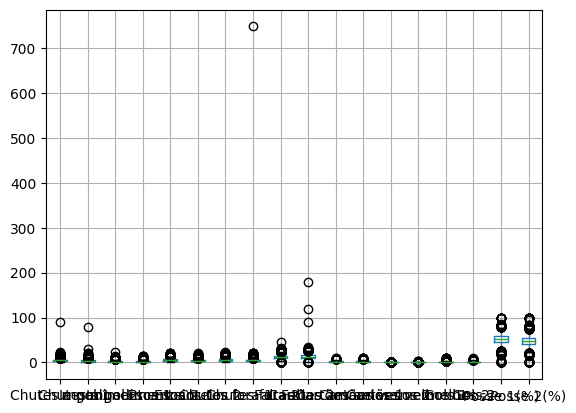

In [218]:
# Tentando identificar outliers aqui
# É um pouco difícil de ver, mas dá para notar alguns dados bem discrepantes
stats_sem_nulos.boxplot()

In [219]:
# Para facilitar a leitura do boxplot
stats_sem_nulos.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'Cartões amarelos 1', 'Cartões amarelos 2',
       'Cartões vermelhos 1', 'Cartões vermelhos 2', 'Gols 1', 'Gols 2',
       'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2', 'Position 1',
       'Position 2'],
      dtype='object')

<Axes: >

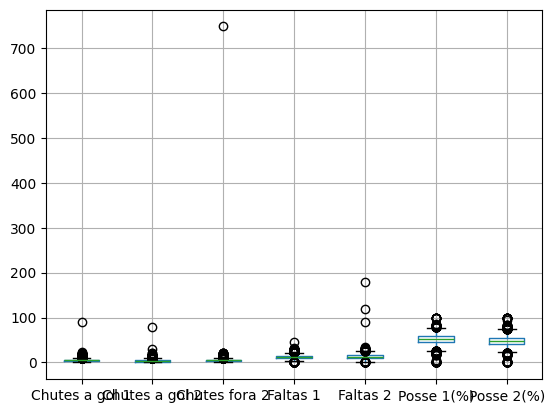

In [220]:
# Visualizando os mais discrepantes
stats_sem_nulos[['Chutes a gol 1','Chutes a gol 2', 'Chutes fora 2', 'Faltas 1', 'Faltas 2', 'Posse 1(%)', 'Posse 2(%)']].boxplot()

In [221]:
# Dá pra perceber que as variáveis anteriores realmente possuem outliers
print(stats_sem_nulos.max())

Chutes a gol 1           90.0
Chutes a gol 2           80.0
Impedimentos 1           23.0
Impedimentos 2           15.0
Escanteios 1             22.0
Escanteios 2             21.0
Chutes fora 1            23.0
Chutes fora 2           748.0
Faltas 1                 46.0
Faltas 2                180.0
Cartões amarelos 1       11.0
Cartões amarelos 2        9.0
Cartões vermelhos 1       2.0
Cartões vermelhos 2       4.0
Gols 1                   10.0
Gols 2                    9.0
Posse 1(%)              100.0
Posse 2(%)              100.0
Time 1                 Zwolle
Time 2                 Zwolle
Position 1              5-4-1
Position 2              5-4-1
dtype: object


In [222]:
# Lembrando que não há valores negativos
stats_sem_nulos.min()

Chutes a gol 1                0.0
Chutes a gol 2                0.0
Impedimentos 1                0.0
Impedimentos 2                0.0
Escanteios 1                  0.0
Escanteios 2                  0.0
Chutes fora 1                 0.0
Chutes fora 2                 0.0
Faltas 1                      0.0
Faltas 2                      0.0
Cartões amarelos 1            0.0
Cartões amarelos 2            0.0
Cartões vermelhos 1           0.0
Cartões vermelhos 2           0.0
Gols 1                        0.0
Gols 2                        0.0
Posse 1(%)                    0.0
Posse 2(%)                    0.0
Time 1                 AEK Atenas
Time 2                 AEK Atenas
Position 1              3-1-3-1-2
Position 2              3-1-3-1-2
dtype: object

<Axes: >

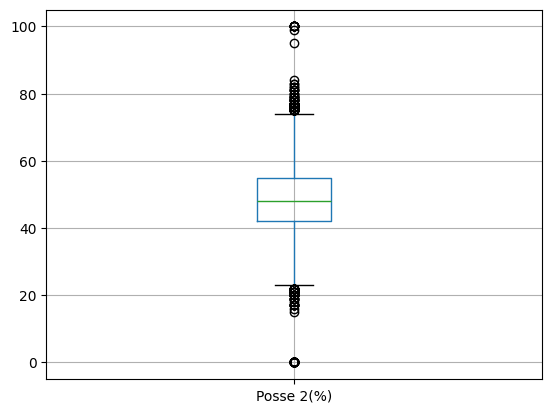

In [223]:
#'Chutes a gol 1'(0),'Chutes a gol 2'(1),'Chutes fora 2'(7), 'Faltas 1'(8), 'Faltas 2'(9), 'Posse 1(%)'(16), 'Posse 2(%)'(17)'
# Olhando mais de perto
stats_sem_nulos[[stats_sem_nulos.columns[17]]].boxplot()

In [224]:
# Criando filtro
bool_filtro = (stats_sem_nulos['Chutes a gol 1']<=30) & (stats_sem_nulos['Chutes a gol 2']<=30) & (stats_sem_nulos['Chutes fora 2']<30) & (stats_sem_nulos['Faltas 1']<40) & (stats_sem_nulos['Faltas 2']<40) & (stats_sem_nulos['Posse 1(%)']<85) & (stats_sem_nulos['Posse 2(%)']<85)

In [225]:
# Eliminando os outliers
stats_sem_nulos = stats_sem_nulos[bool_filtro]

In [226]:
# Verificando os valores que ficaram
stats_sem_nulos.max()

Chutes a gol 1           23.0
Chutes a gol 2           30.0
Impedimentos 1           23.0
Impedimentos 2           15.0
Escanteios 1             22.0
Escanteios 2             21.0
Chutes fora 1            23.0
Chutes fora 2            21.0
Faltas 1                 32.0
Faltas 2                 35.0
Cartões amarelos 1       11.0
Cartões amarelos 2        9.0
Cartões vermelhos 1       2.0
Cartões vermelhos 2       4.0
Gols 1                   10.0
Gols 2                    9.0
Posse 1(%)               84.0
Posse 2(%)               84.0
Time 1                 Zwolle
Time 2                 Zwolle
Position 1              5-4-1
Position 2              5-4-1
dtype: object

<Axes: >

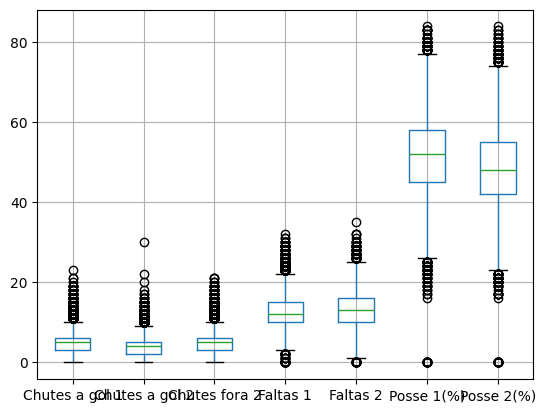

In [227]:
stats_sem_nulos[['Chutes a gol 1','Chutes a gol 2','Chutes fora 2', 'Faltas 1', 'Faltas 2', 'Posse 1(%)', 'Posse 2(%)']].boxplot()

In [228]:
# Nesta função, está sendo criada uma coluna "Resultado", que afirma se o time mandante ganhou (1), empatou (0) ou perdeu (-1)
stats_sem_nulos['Resultado'] = np.where(stats_sem_nulos['Gols 1'] > stats_sem_nulos['Gols 2'], 1, 
                          np.where(stats_sem_nulos['Gols 1'] < stats_sem_nulos['Gols 2'], -1, 0))

stats_sem_nulos['Resultado'].head()

C:\Users\phf33\AppData\Local\Temp\ipykernel_10320\1592084058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_sem_nulos['Resultado'] = np.where(stats_sem_nulos['Gols 1'] > stats_sem_nulos['Gols 2'], 1,


0    1
1    0
2    0
3    1
4    1
Name: Resultado, dtype: int64

In [229]:
stats_sem_nulos.shape # tamanho do nosso dataFrame após a remoção de valores nulos

(23417, 23)

In [230]:
stats_sem_nulos.groupby(['Resultado'])['Resultado'].count()

Resultado
-1     6947
 0     5893
 1    10577
Name: Resultado, dtype: int64

In [231]:
stats_sem_nulos.info() # Aqui precisa ver se iremos alterar algum formato de alguma variavel

<class 'pandas.core.frame.DataFrame'>
Index: 23417 entries, 0 to 27714
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       23417 non-null  float64
 1   Chutes a gol 2       23417 non-null  float64
 2   Impedimentos 1       23417 non-null  float64
 3   Impedimentos 2       23417 non-null  float64
 4   Escanteios 1         23417 non-null  float64
 5   Escanteios 2         23417 non-null  float64
 6   Chutes fora 1        23417 non-null  float64
 7   Chutes fora 2        23417 non-null  float64
 8   Faltas 1             23417 non-null  float64
 9   Faltas 2             23417 non-null  float64
 10  Cartões amarelos 1   23417 non-null  float64
 11  Cartões amarelos 2   23417 non-null  float64
 12  Cartões vermelhos 1  23417 non-null  float64
 13  Cartões vermelhos 2  23417 non-null  float64
 14  Gols 1               23417 non-null  float64
 15  Gols 2               23417 non-null  floa

In [232]:
nulos_por_coluna = stats_sem_nulos.isna().sum() # Confirmando que nosso dataFrame nao possui valores nulos
print(f"Numéros de valores nulos: \n{nulos_por_coluna}")

Numéros de valores nulos: 
Chutes a gol 1         0
Chutes a gol 2         0
Impedimentos 1         0
Impedimentos 2         0
Escanteios 1           0
Escanteios 2           0
Chutes fora 1          0
Chutes fora 2          0
Faltas 1               0
Faltas 2               0
Cartões amarelos 1     0
Cartões amarelos 2     0
Cartões vermelhos 1    0
Cartões vermelhos 2    0
Gols 1                 0
Gols 2                 0
Posse 1(%)             0
Posse 2(%)             0
Time 1                 0
Time 2                 0
Position 1             0
Position 2             0
Resultado              0
dtype: int64


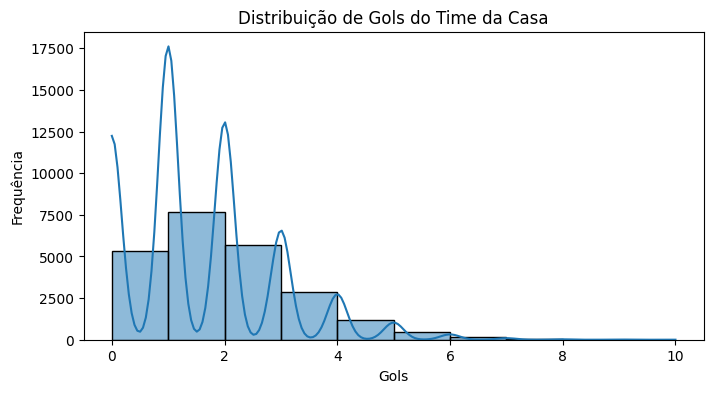

In [233]:
# Histograma de gols do time da casa
plt.figure(figsize=(8, 4))
sns.histplot(data=stats_sem_nulos, x='Gols 1', bins=10, kde=True)  # 'kde' adiciona uma linha de densidade
plt.title("Distribuição de Gols do Time da Casa")
plt.xlabel("Gols")
plt.ylabel("Frequência")
plt.show()

C:\Users\phf33\AppData\Local\Temp\ipykernel_10320\1509092755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_sem_nulos, x='Resultado', y='Chutes a gol 1', palette="viridis")


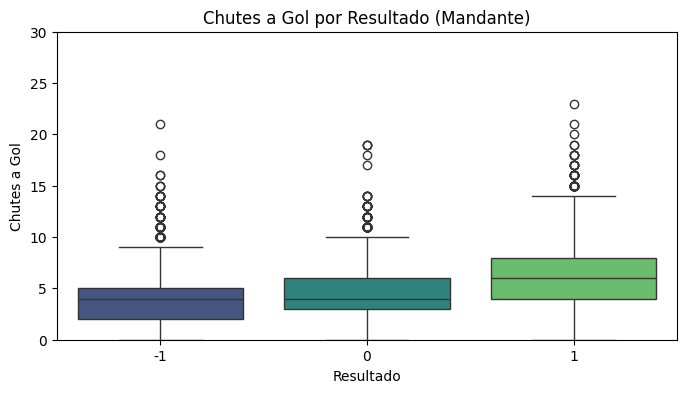

In [234]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=stats_sem_nulos, x='Resultado', y='Chutes a gol 1', palette="viridis")  
plt.title("Chutes a Gol por Resultado (Mandante)")
plt.xlabel("Resultado")
plt.ylabel("Chutes a Gol")
plt.ylim(0, 30)
plt.show()
# Neste grafíco é possível confirmar que as partidas ganhas teve uma média no número de chutes ao gol maior que na derrota/empate

C:\Users\phf33\AppData\Local\Temp\ipykernel_10320\610341631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_sem_nulos, x='Resultado', y='Chutes a gol 2', palette="viridis")


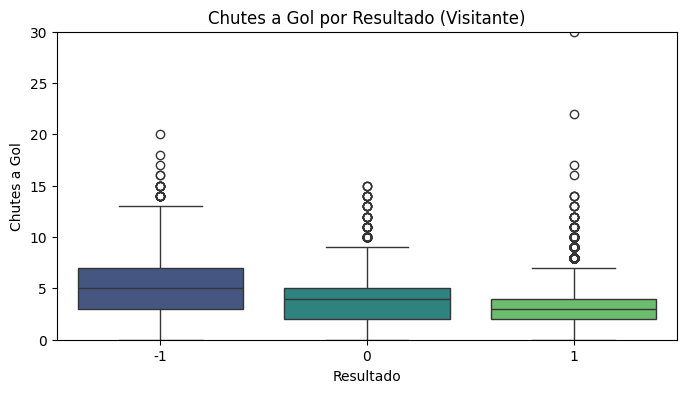

In [235]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=stats_sem_nulos, x='Resultado', y='Chutes a gol 2', palette="viridis")  
plt.title("Chutes a Gol por Resultado (Visitante)")
plt.xlabel("Resultado")
plt.ylabel("Chutes a Gol")
plt.ylim(0, 30)
plt.show()
# No caso do time visitante temos que (-1) é nossa vitória e (1) nossa derrota

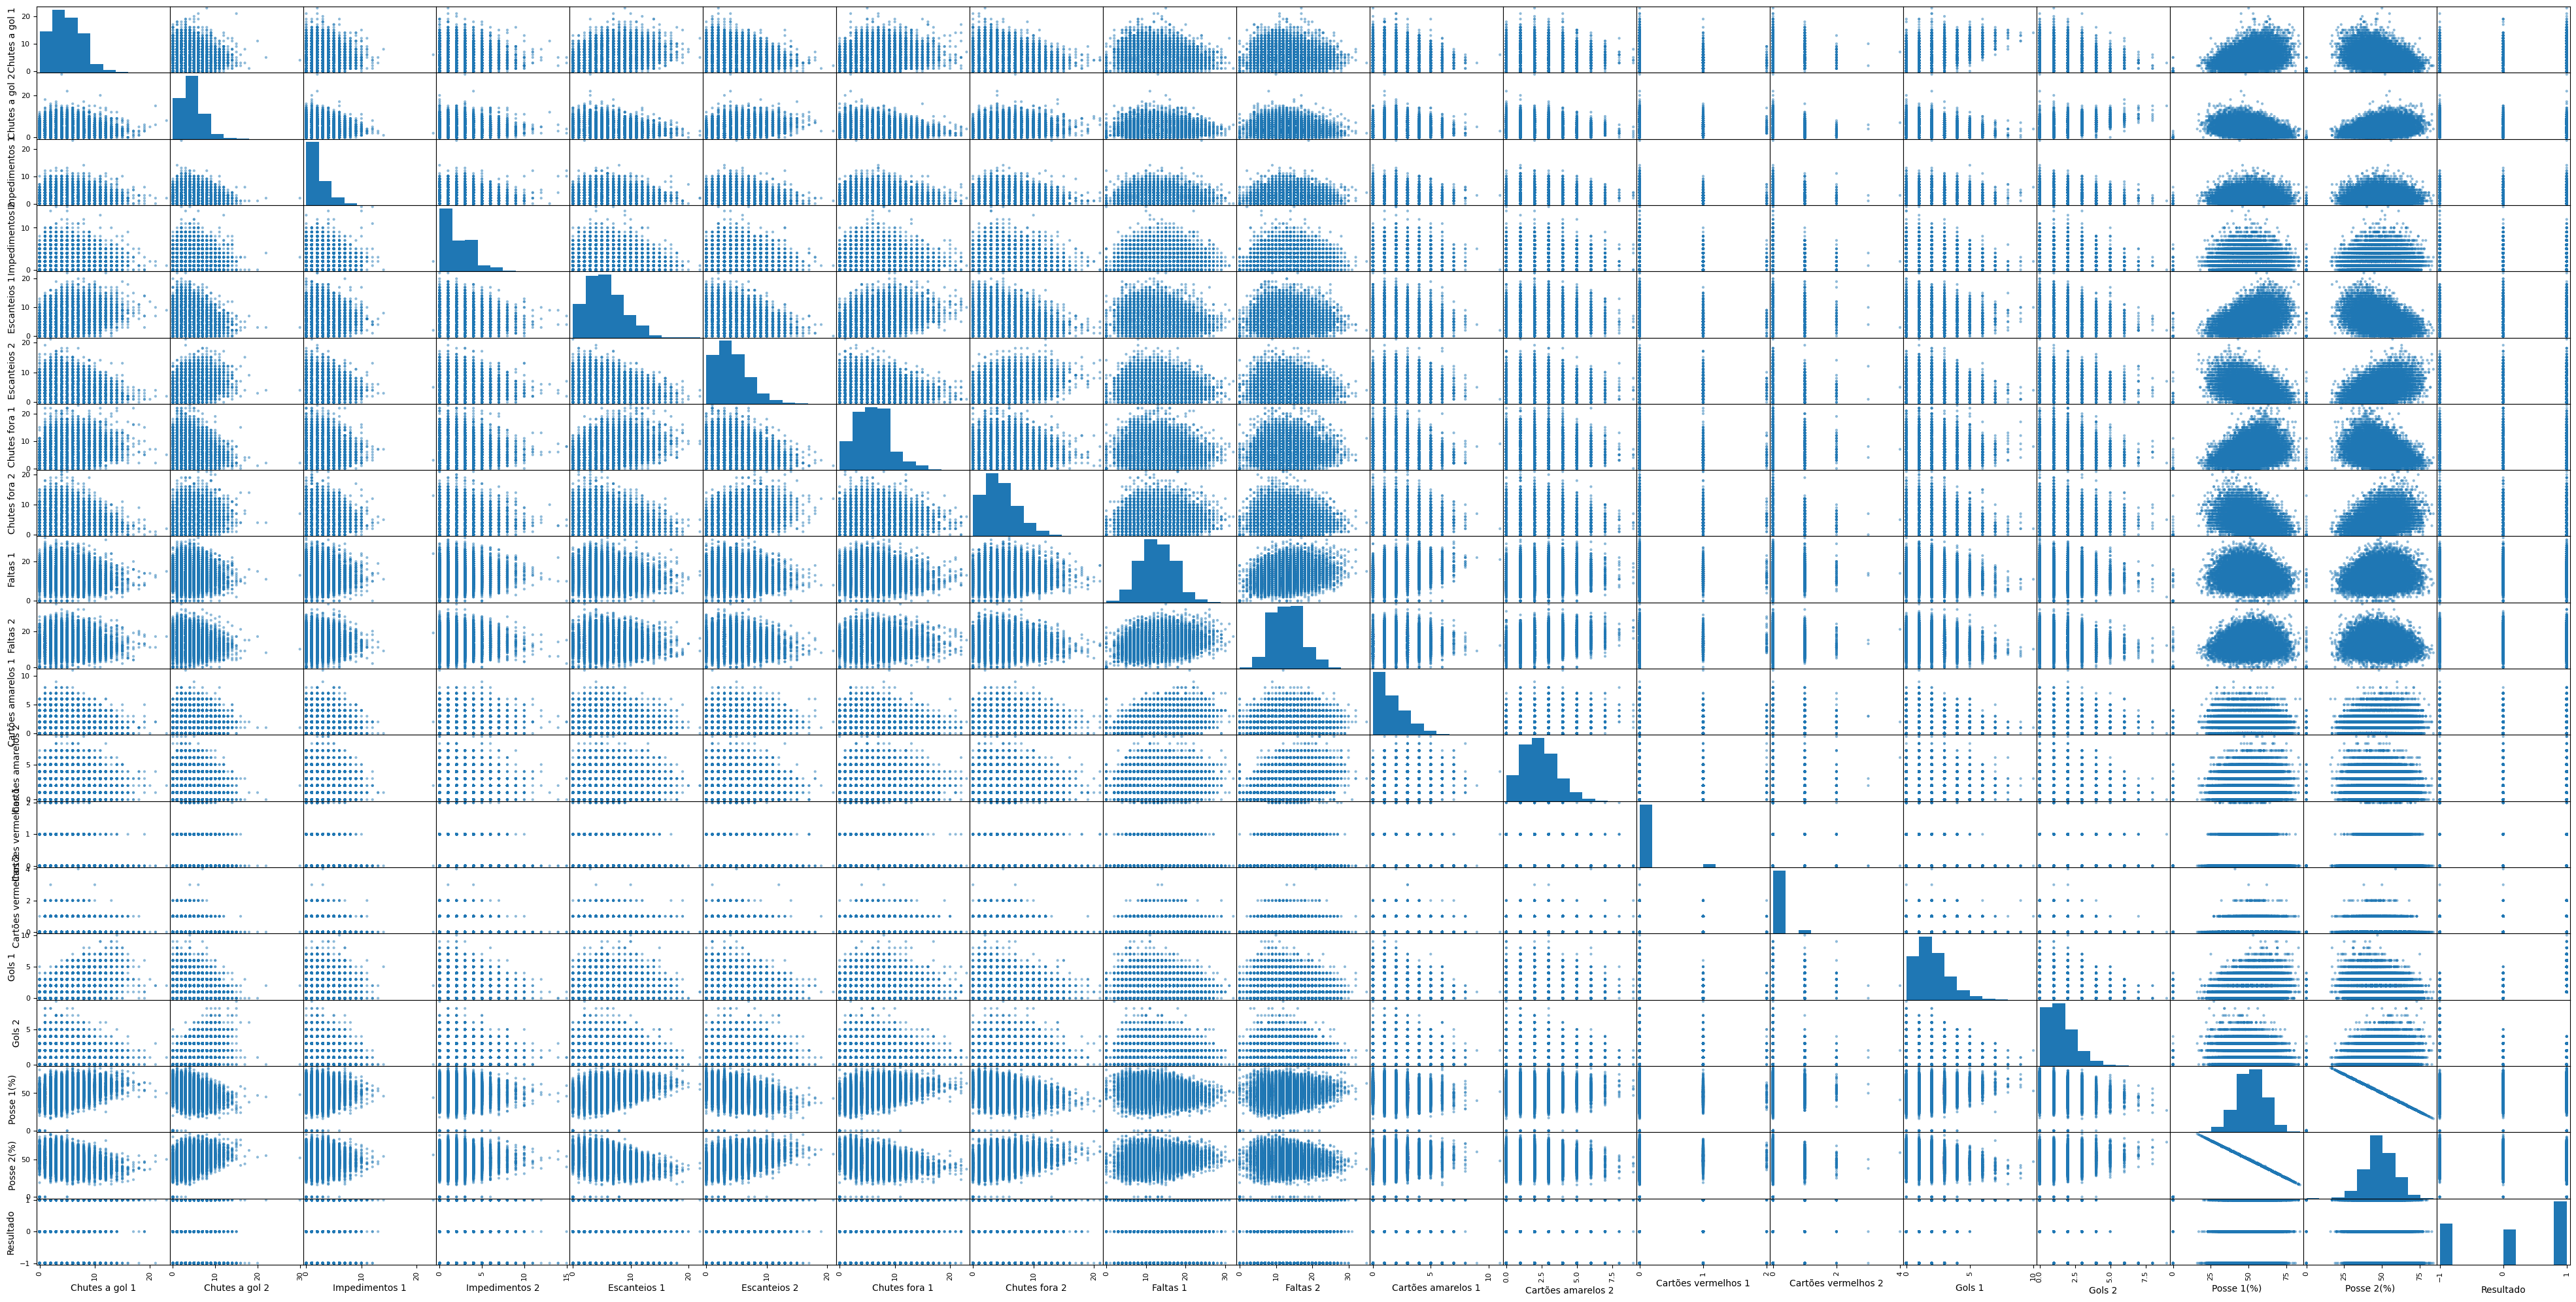

In [236]:
stats_numericos = stats_sem_nulos.select_dtypes(include=['int64', 'float64'])
pd.plotting.scatter_matrix(stats_numericos, figsize=(50, 25))
plt.show()

# Este gráfico mostra a relação entre cada par de variável do nosso dataframe, ficou meio ruim de ver mas da pra chegar em algumas conclusões como falta de padrão e relação entre variáveis
# Além de confirmar coisas já conhecidas do senso comum, como quanto mais posse de bola um time possui, menos posse o outro time tem.

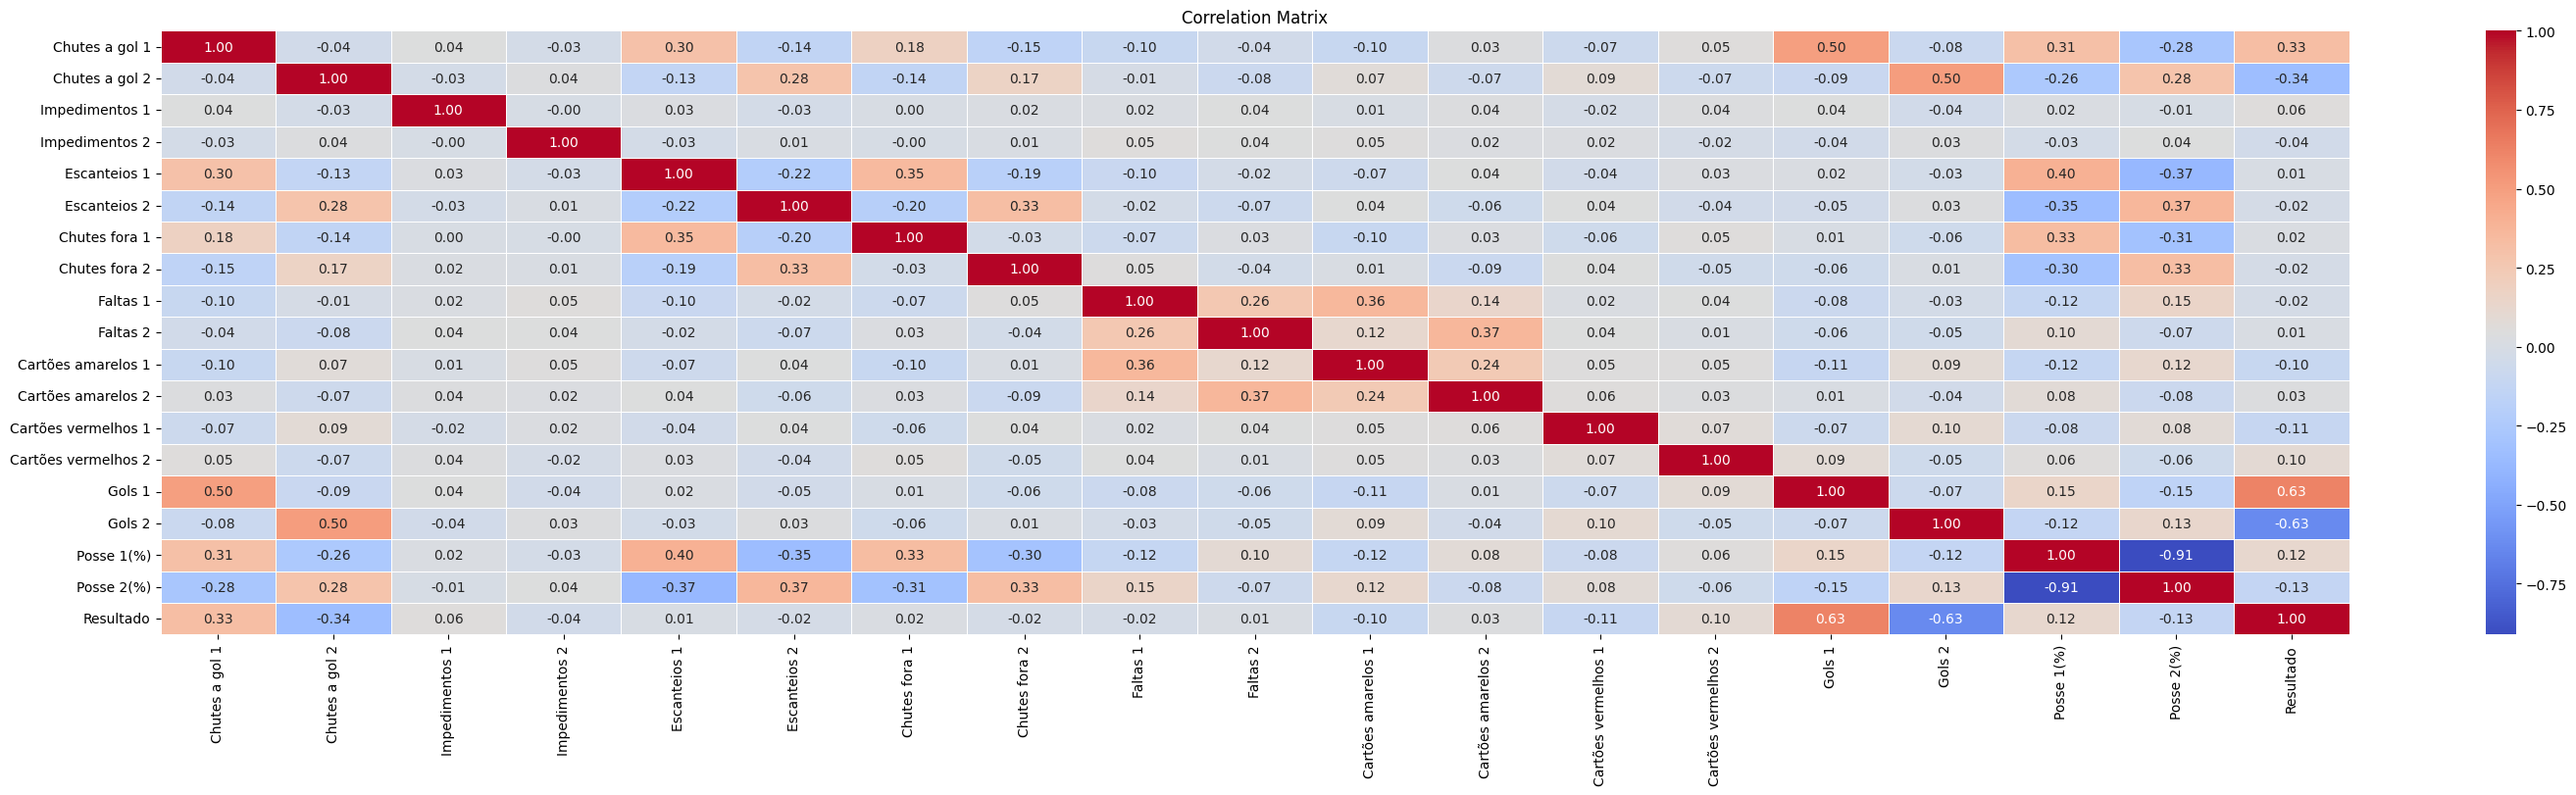

In [237]:
corr = stats_sem_nulos.drop(columns=['Time 1', 'Time 2', 'Position 1', 'Position 2'])
corr = corr.corr()

plt.figure(figsize=(36, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

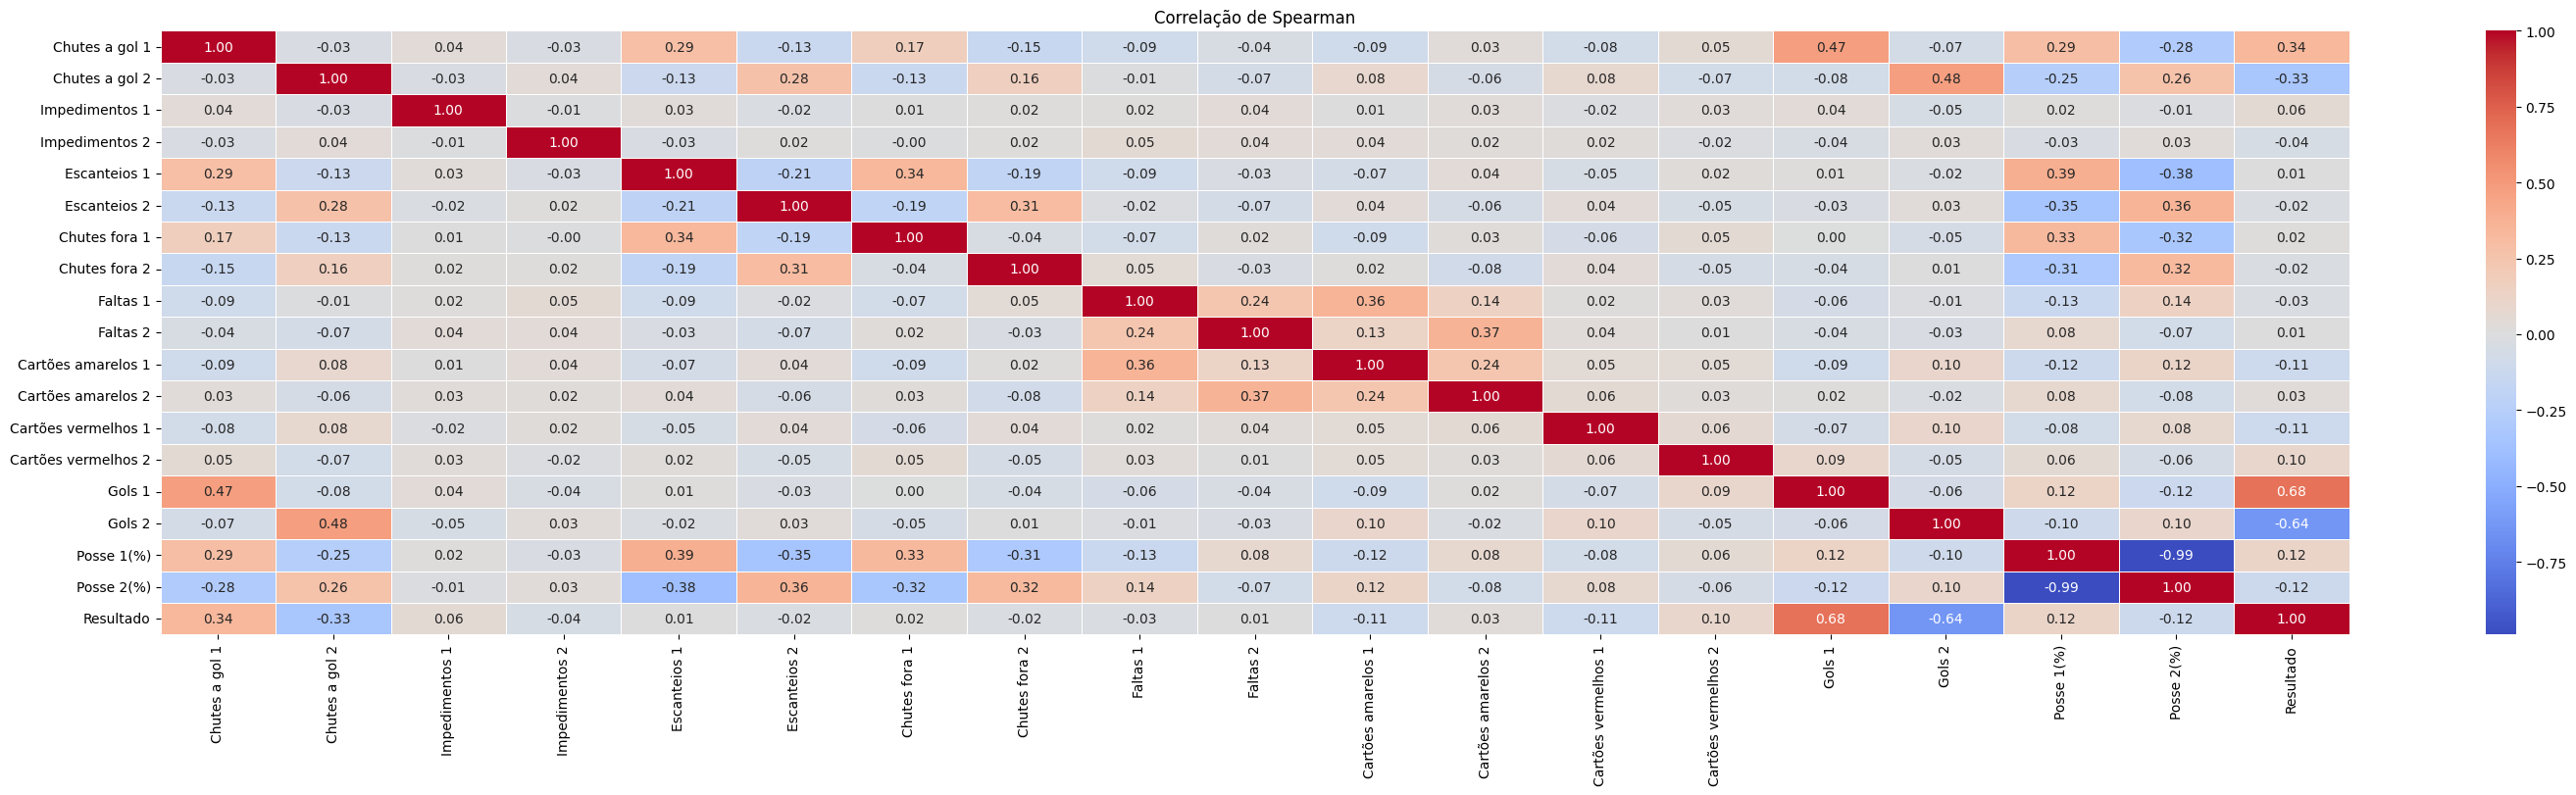

In [238]:
df_corr = stats_sem_nulos.drop(columns=['Time 1', 'Time 2', 'Position 1', 'Position 2'])

# Calcule Spearman (exemplo)
plt.figure(figsize=(36, 8))
corr_spearman = df_corr.corr(method='spearman')
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlação de Spearman")
plt.show()


# Neste caso, confirma algo bem óbvio que os gols tem grande correlação com o resultado, então não usaremos no nosso treinamento de machine learning
# Além disso, o número de posse 1 e 2 são redundantes

In [239]:
# Transformando strings em números

# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
stats_sem_nulos['Time 1'] = lb.fit_transform(stats_sem_nulos['Time 1'])
stats_sem_nulos['Time 2'] = lb.fit_transform(stats_sem_nulos['Time 2'])
stats_sem_nulos['Position 1'] = lb.fit_transform(stats_sem_nulos['Position 1'])
stats_sem_nulos['Position 2'] = lb.fit_transform(stats_sem_nulos['Position 2'])

# Remove valores missing eventualmente gerados
stats_sem_nulos.dropna(inplace = True)

C:\Users\phf33\AppData\Local\Temp\ipykernel_10320\624583597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_sem_nulos['Time 1'] = lb.fit_transform(stats_sem_nulos['Time 1'])
C:\Users\phf33\AppData\Local\Temp\ipykernel_10320\624583597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_sem_nulos['Time 2'] = lb.fit_transform(stats_sem_nulos['Time 2'])
C:\Users\phf33\AppData\Local\Temp\ipykernel_10320\624583597.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

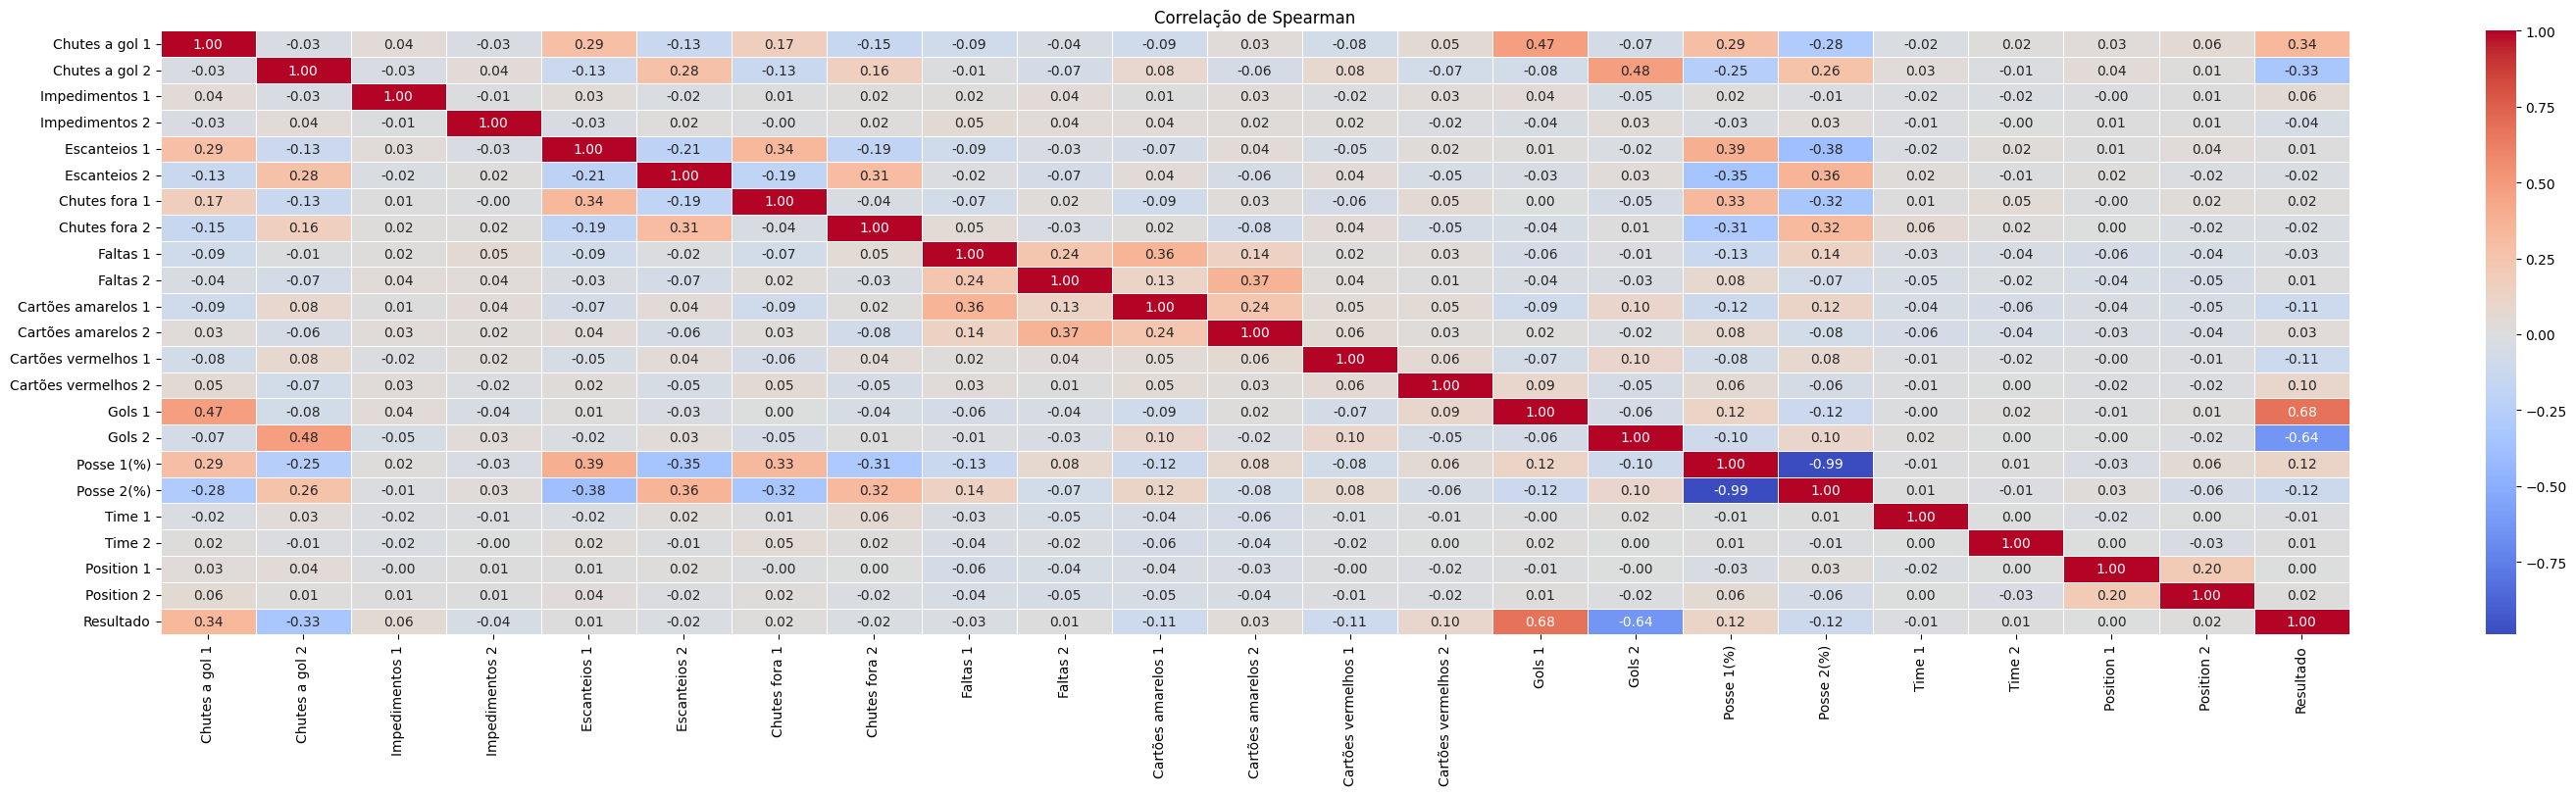

In [240]:
df_corr = stats_sem_nulos

# Calcule Spearman (exemplo)
plt.figure(figsize=(36, 8))
corr_spearman = df_corr.corr(method='spearman')
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlação de Spearman")
plt.show()


In [ ]:
# Treinamento de Machine Learning

# Feito o tratamento de dados, nós podemos começar a fazer o treinamento do machine learning
## A gente vai precisar dividir os dados para treinamento e para teste

# Aqui há um problema que os modelos de regressão que usaremos não permitem strings, então irei tirar os nomes e a posição
# caso a acuracia não seja ideal, podemos definir como podemos adicionar elas para melhorar o resultado

X = stats_sem_nulos.drop(columns=['Gols 1', 'Gols 2', 'Resultado'])
Y = stats_sem_nulos.Resultado # aqui ta a colunas que ele vai comparar pra ver se acertou


X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state = 42)  #separando 20% para o teste


In [242]:
# Aqui está acontecendo a normalização dos dados
scaler = MinMaxScaler() 
X_treino_norma = scaler.fit_transform(X_treino)
X_teste_norma = scaler.transform(X_teste)


In [243]:
# Aqui está o primeiro treinamento de Machine Learning, utilizando REGRESSÃO LINEAR
LR = LogisticRegression(random_state=0)
LR.fit(X_treino_norma, Y_treino)

y_pred = LR.predict(X_teste_norma)
print(classification_report(Y_teste, y_pred))

              precision    recall  f1-score   support

          -1       0.55      0.60      0.57      1397
           0       0.37      0.11      0.17      1179
           1       0.60      0.80      0.69      2108

    accuracy                           0.57      4684
   macro avg       0.51      0.50      0.48      4684
weighted avg       0.53      0.57      0.52      4684



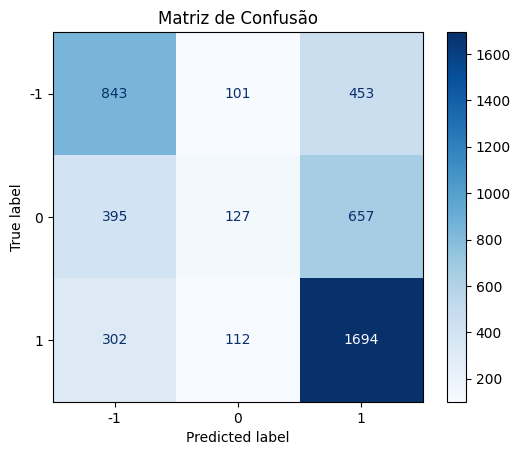

In [ ]:
# Matriz de confusão para a REGRESSÃO LINEAR
cm = confusion_matrix(Y_teste, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [245]:
# Aqui está sendo usado o método de Árvore de Decisão para o machine learning
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_treino_norma, Y_treino) 

y_pred = DT.predict(X_teste_norma)
print(classification_report(Y_teste, y_pred))

              precision    recall  f1-score   support

          -1       0.44      0.46      0.45      1397
           0       0.28      0.28      0.28      1179
           1       0.58      0.56      0.57      2108

    accuracy                           0.46      4684
   macro avg       0.43      0.43      0.43      4684
weighted avg       0.46      0.46      0.46      4684



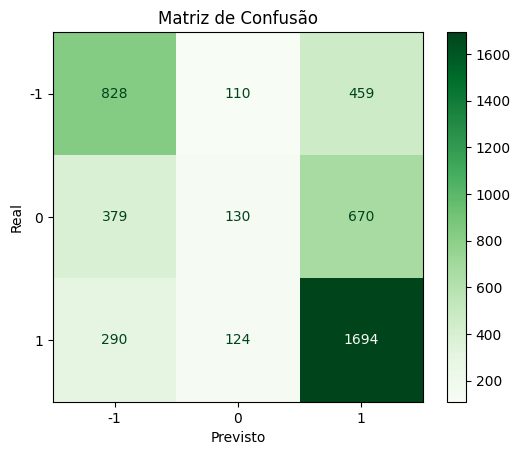

In [253]:
# Matriz de confusão para a Árvore de Decisão
cm = confusion_matrix(Y_teste, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Greens')
plt.title("Matriz de Confusão")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [247]:
# Aqui está sendo usado o método de Classificação de Árvore Aleatória para o machine learning
RF = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=42)
RF.fit(X_treino_norma, Y_treino)

y_pred = RF.predict(X_teste_norma)
print(classification_report(Y_teste, y_pred))

              precision    recall  f1-score   support

          -1       0.55      0.59      0.57      1397
           0       0.36      0.11      0.17      1179
           1       0.60      0.80      0.69      2108

    accuracy                           0.57      4684
   macro avg       0.50      0.50      0.48      4684
weighted avg       0.52      0.57      0.52      4684



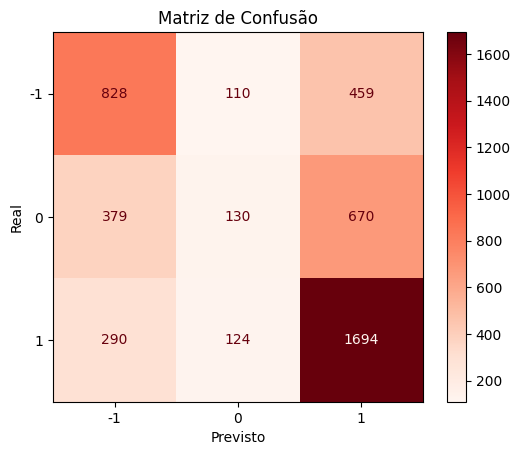

In [260]:
# Matriz de confusão para a Classificação de Árvore Aleatória
cm = confusion_matrix(Y_teste, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Reds')
plt.title("Matriz de Confusão")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [249]:
# Vendo a importancia que o algoritmo deu para cada coluna

for i in zip(X.columns, DT.feature_importances_):
    print(i)

('Chutes a gol 1', np.float64(0.08545686549369859))
('Chutes a gol 2', np.float64(0.08574092261459264))
('Impedimentos 1', np.float64(0.040664699732681754))
('Impedimentos 2', np.float64(0.0397963745102472))
('Escanteios 1', np.float64(0.05007820071241468))
('Escanteios 2', np.float64(0.04732821037833912))
('Chutes fora 1', np.float64(0.056217183492854234))
('Chutes fora 2', np.float64(0.052905566896802154))
('Faltas 1', np.float64(0.05763220714859876))
('Faltas 2', np.float64(0.059567345516567304))
('Cartões amarelos 1', np.float64(0.034434408676288504))
('Cartões amarelos 2', np.float64(0.03373022763880837))
('Cartões vermelhos 1', np.float64(0.005465148350800876))
('Cartões vermelhos 2', np.float64(0.006225660304152574))
('Posse 1(%)', np.float64(0.038120224275579165))
('Posse 2(%)', np.float64(0.037250320783028645))
('Time 1', np.float64(0.08733681156904657))
('Time 2', np.float64(0.08384541271306872))
('Position 1', np.float64(0.05349555239519905))
('Position 2', np.float64(0.0447

In [250]:
for i in zip(X.columns, RF.feature_importances_):
    print(i)

('Chutes a gol 1', np.float64(0.12174589783184411))
('Chutes a gol 2', np.float64(0.11740317423999794))
('Impedimentos 1', np.float64(0.033107663435051525))
('Impedimentos 2', np.float64(0.03376468102732181))
('Escanteios 1', np.float64(0.050430042614817816))
('Escanteios 2', np.float64(0.046075556575833225))
('Chutes fora 1', np.float64(0.04825131107414998))
('Chutes fora 2', np.float64(0.04390669630156821))
('Faltas 1', np.float64(0.050619307335784215))
('Faltas 2', np.float64(0.051441343242180804))
('Cartões amarelos 1', np.float64(0.03115759883590488))
('Cartões amarelos 2', np.float64(0.031231432324431718))
('Cartões vermelhos 1', np.float64(0.008332177419242944))
('Cartões vermelhos 2', np.float64(0.007480059563083144))
('Posse 1(%)', np.float64(0.049126641208668095))
('Posse 2(%)', np.float64(0.04844393311435213))
('Time 1', np.float64(0.07247336478519681))
('Time 2', np.float64(0.07088295489895409))
('Position 1', np.float64(0.042159106726567815))
('Position 2', np.float64(0.04

In [251]:
('Chutes a gol 1', 0.15066644566648812)
('Chutes a gol 2', 0.14798569017710891)
('Impedimentos 1', 0.07166473907864207)
('Impedimentos 2', 0.07228598877841154)
('Cartões amarelos 1', 0.06199249380061439)
('Cartões amarelos 2', 0.06848625806788695)
('Cartões vermelhos 1', 0.013712692972221873)
('Cartões vermelhos 2', 0.011103266904542297)
('Posse 1(%)', 0.09785194025302897)
('Posse 2(%)', 0.09666017206944909)
('Chutes total 1', 0.10779373266578758)
('Chutes total 2', 0.09979657956581821)

('Chutes total 2', 0.09979657956581821)